In [21]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [22]:
tsla = pd.read_csv('./data/TSLA_historical_data.csv', parse_dates=['Date'], index_col='Date')
tsla

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-03-26,272.059998,284.899994,266.510010,282.660004,153629800
2025-03-27,273.130005,291.850006,271.820007,272.480011,162572100
2025-03-28,263.549988,276.100006,260.570007,275.579987,123809400


In [23]:
# Crear variables seguras (lag features)
#tsla['prev_day_Close'] = tsla['Close'].shift(1)  # Cierre del día anterior
tsla['prev_day_Volume'] = tsla['Volume'].shift(1)  # Volumen del día anterior
tsla['prev_day_High'] = tsla['High'].shift(1)  # Máximo del día anterior

In [24]:
tsla

,Open,High,Low,Close,Volume,prev_day_Volume,prev_day_High
Date,,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,NaN,NaN
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,281494500.0,1.666667
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,257806500.0,2.028000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,123282000.0,1.728000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,77097000.0,1.540000
...,...,...,...,...,...,...,...
2025-03-26,272.059998,284.899994,266.510010,282.660004,153629800,150361500.0,288.200012
2025-03-27,273.130005,291.850006,271.820007,272.480011,162572100,153629800.0,284.899994
2025-03-28,263.549988,276.100006,260.570007,275.579987,123809400,162572100.0,291.850006


In [25]:
# Variable objetivo
y = tsla['Open']

# Features sin leakage (exógenas)
exog = tsla[['prev_day_Volume', 'prev_day_High']].dropna()
y = y.loc[exog.index]  # Alinear índices

In [26]:
# AutoARIMA para encontrar mejores parámetros
model = auto_arima(
    y,
    exogenous=exog,
    seasonal=True,
    m=5,  # Ciclo estacional (ajustar según datos)
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

print(model.order, model.seasonal_order)  # Ver parámetros encontrados

c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: F

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=inf, Time=6.07 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=23137.298, Time=0.09 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=23139.186, Time=0.63 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=23138.975, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=23135.953, Time=0.07 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=23137.641, Time=0.40 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=23137.400, Time=0.38 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=inf, Time=1.57 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=23138.759, Time=0.25 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=23138.774, Time=0.32 sec


c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=23140.026, Time=0.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 11.061 seconds
(0, 1, 0) (0, 0, 0, 5)


In [27]:
# Entrenar modelo SARIMAX final
sarimax_model = SARIMAX(
    y,
    exog=exog,
    order=(0, 1, 0),  # Reemplazar con lo que sugirió auto_arima
    seasonal_order=(0, 0, 0, 5),
    enforce_stationarity=False
)
results = sarimax_model.fit(disp=False)
print(results.summary())

c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 3712
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -24954.141
Date:                Wed, 02 Apr 2025   AIC                          49914.282
Time:                        17:37:20   BIC                          49932.938
Sample:                             0   HQIC                         49920.920
                               - 3712                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
prev_day_Volume -2.019e-09    7.9e-06     -0.000      1.000   -1.55e-05    1.55e-05
prev_day_High       0.0282     31.023      0.001      0.999     -60.777      60.833
sigma2           1.107e+05   1.1

c:\Users\linkiafp\miniconda3\envs\iabd_time_series\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


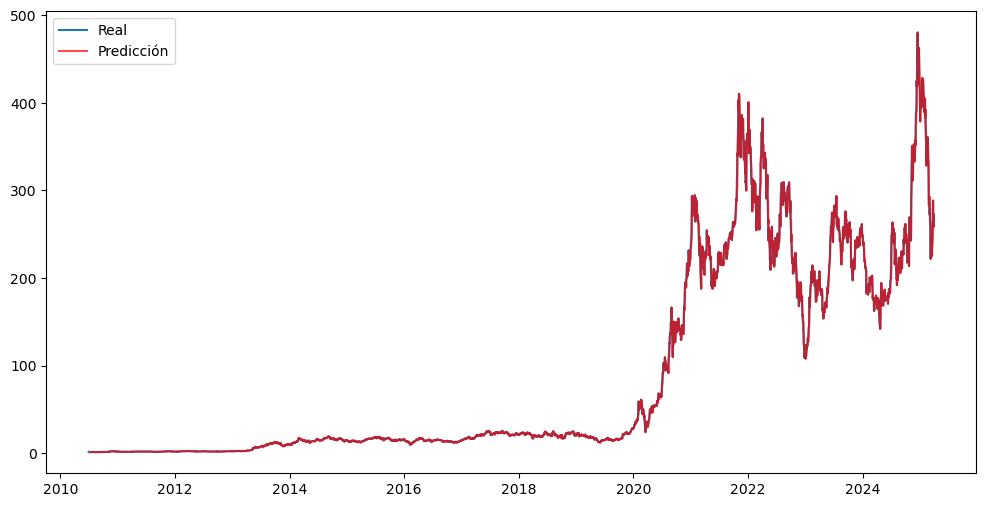

In [28]:
# Predicción en el conjunto de entrenamiento (para validación)
predictions = results.get_prediction(start=10, dynamic=False)  # Evitar primeras 10 obs
forecasted = predictions.predicted_mean

# Gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y, label='Real')
plt.plot(forecasted, color='red', alpha=0.7, label='Predicción')
plt.legend()
plt.show()